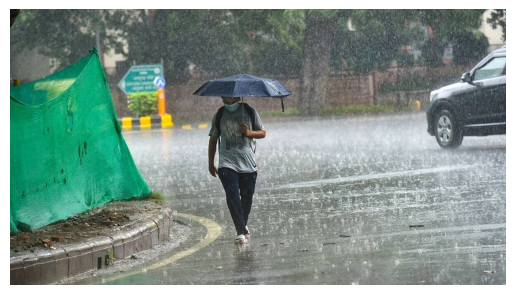

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

# Carica l'immagine originale
img_path = "test_image.jpg"
image=mpimg.imread(img_path)
plt.axis('off')
plt.imshow(image)


Phase 1 : Resize and Crop

 Resizing an image to a specific width and height can be useful in reducing the computational cost of training and testing image classification models. This is because smaller images require less memory and computational resources to process. In addition, resizing an image can help in reducing the amount of noise or irrelevant information in the image, which can improve the performance of the classifier.

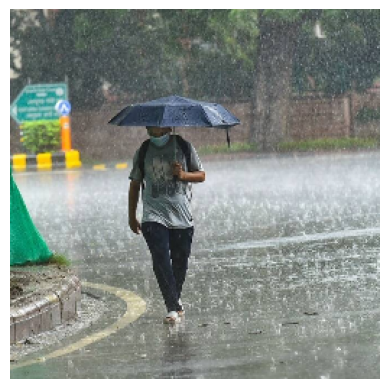

In [2]:
def resize_and_crop(img, size):
    h, w = img.shape[:2]
    if h > w:
        img = cv2.resize(img, (size, int(h * size / w)))
    else:
        img = cv2.resize(img, (int(w * size / h), size))
    h, w = img.shape[:2]
    h_margin = (h - size) // 2
    w_margin = (w - size) // 2
    return img[h_margin:h_margin+size, w_margin:w_margin+size]

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Ridimensiona e ritaglia l'immagine
img = resize_and_crop(img, size=256)
plt.imshow(img)
plt.axis('off')
plt.show()

Phase 2 : Histogram equalization

This technique is used to enhance the contrast of an image by redistributing the intensity values. This can be particularly useful when dealing with images that have low contrast or are unevenly lit.

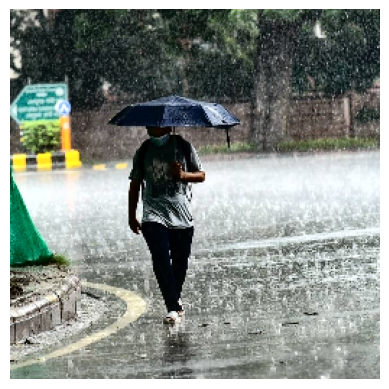

In [3]:
def equalize_hist(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

img = equalize_hist(img)
plt.imshow(img)
plt.axis('off')
plt.show()

Phase 3 : Median filtering

Median filtering is a type of image denoising technique that replaces each pixel value with the median value of its neighboring pixels. This can help to remove noise from an image, while preserving the edges and texture of the image.

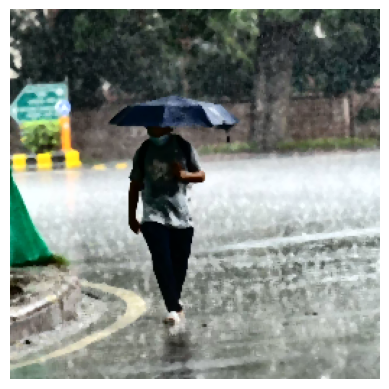

In [4]:
def median_filter(img, kernel_size):
    return cv2.medianBlur(img, kernel_size)

# Applica il filtro di mediana
img = median_filter(img, kernel_size=3)
plt.imshow(img)
plt.axis('off')
plt.show()

Phase 4 : Threshold segmentation

This technique is used to segment the image into regions based on a threshold value. Pixels with intensity values above the threshold are considered part of the object of interest, while those below the threshold are considered part of the background.

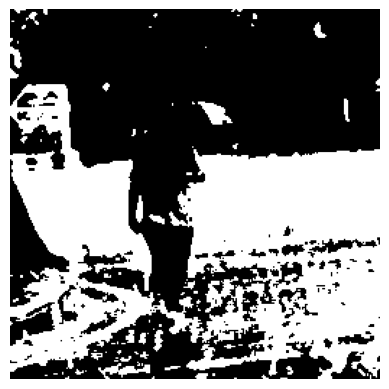

In [5]:
def threshold_segmentation(img, threshold):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    return thresh

img = threshold_segmentation(img, threshold=150)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

Phase 5 : Random rotation

Applying a random rotation to the image can help to increase the diversity of the dataset and make the model more robust to variations in the orientation of the object of interest.

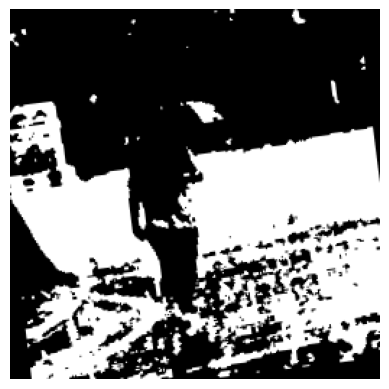

In [6]:
def random_rotate(img, angle_range):
    angle = np.random.uniform(-angle_range, angle_range)
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    return cv2.warpAffine(img, M, (w, h))

img = random_rotate(img, angle_range=10)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

Phase 6 : Image normalization

Normalizing the pixel values to be in the range of [0,1] can help to make the training process more stable and improve the performance of the model.

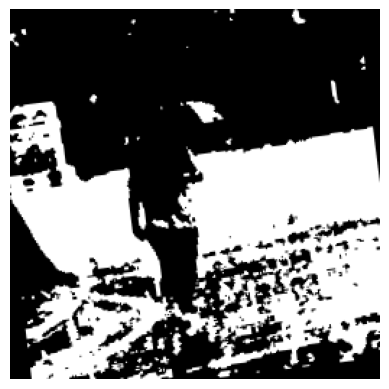

In [7]:
# Normalizza l'immagine
img = img.astype(np.float32) / 255.
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

Phase 7 : Reshape image

Adding an additional dimension to the image allows it to be processed as a batch during the training process.

In [8]:
# Aggiungi una dimensione per rappresentare il batch
img = np.expand_dims(img, axis=-1)

plt.imshow(img[0], cmap='gray')
plt.axis('off')
plt.show()

Overall, this combination of preprocessing techniques helps to standardize and enhance the images in a dataset, while also increasing the diversity of the dataset through random rotations. This can ultimately lead to improved performance of the machine learning model on the task of weather classification.

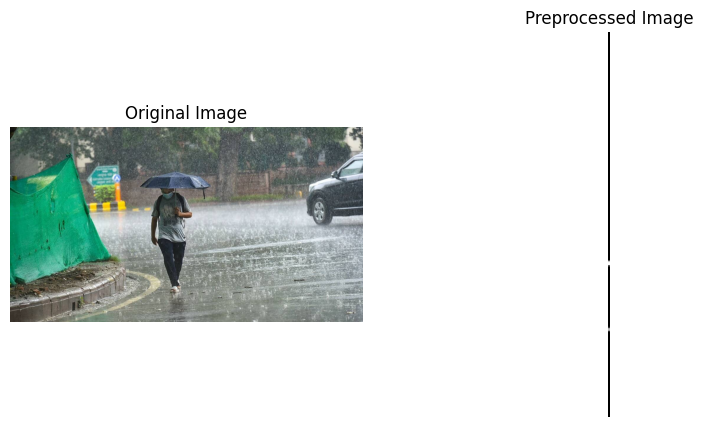

In [9]:

original_img = cv2.imread(img_path)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(original_img[:, :, ::-1])
axs[0].set_title("Original Image")
axs[0].axis('off')
axs[1].imshow(img[0],cmap='gray')
axs[1].set_title("Preprocessed Image")
axs[1].axis('off')
plt.show()


Data Augmentation

Data augmentation is a technique used in machine learning to artificially increase the size and diversity of a training dataset by applying a variety of random transformations to the existing images. These transformations may include rotations, flips, zooms, and shifts, among others.

Data augmentation is particularly useful in image classification because it helps to increase the robustness of the model by exposing it to a wider range of possible variations in the input data. This can help the model to learn more generalizable features that are not specific to a particular instance of an object in the image, but rather capture the essence of the object across different orientations, lighting conditions, and other factors that might affect the appearance of the object.

Data augmentation can also help to prevent overfitting by creating a more diverse and representative training dataset that captures a wider range of possible scenarios that the model might encounter in real-world applications. This can improve the model's ability to generalize to new and unseen data, which is critical for achieving high performance in image classification tasks.

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

train_dir = './dataset_train_preprocessed'
test_dir = './dataset_test_preprocessed'
batch_size = 32
img_height, img_width = 256, 256
input_shape = (img_height, img_width, 3)

# Define the data generators for training and testing
train_datagen = ImageDataGenerator() # rescale the pixel values between 0 and 1

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_dir, # path to the training dataset
        target_size=(img_height, img_width), # resize images to this size
        batch_size=batch_size,
        class_mode='categorical') # output class labels as one-hot vectors

test_generator = test_datagen.flow_from_directory(
        test_dir,  # path to the testing dataset
        target_size=(img_height, img_width),
        batch_size=1, # batch size of 1 to test one image at a time
        class_mode='categorical')

# Check the mapping of labels to class indices
print(train_generator.class_indices)


Found 1123 images belonging to 4 classes.
Found 134 images belonging to 4 classes.
{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}


In [11]:
# Create the CNN model
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
        train_generator,
        epochs=10,
        steps_per_epoch=train_generator.samples // batch_size)

# Save the model
model.save('weather_classification_with_preprocessing.h5')


Epoch 1/10
35/35 [==============================] - 100s 3s/step - loss: 16.8617 - accuracy: 0.4198
Epoch 2/10
35/35 [==============================] - 100s 3s/step - loss: 5.4725 - accuracy: 0.5206
Epoch 3/10
35/35 [==============================] - 98s 3s/step - loss: 2.9590 - accuracy: 0.5353
Epoch 4/10
35/35 [==============================] - 101s 3s/step - loss: 2.3712 - accuracy: 0.5188
Epoch 5/10
35/35 [==============================] - 100s 3s/step - loss: 1.8088 - accuracy: 0.5289
Epoch 6/10
35/35 [==============================] - 99s 3s/step - loss: 1.6792 - accuracy: 0.5619
Epoch 7/10
35/35 [==============================] - 104s 3s/step - loss: 1.6299 - accuracy: 0.5775
Epoch 8/10
35/35 [==============================] - 103s 3s/step - loss: 1.4600 - accuracy: 0.5866
Epoch 9/10
35/35 [==============================] - 104s 3s/step - loss: 1.4307 - accuracy: 0.6040
Epoch 10/10
35/35 [==============================] - 139s 4s/step - loss: 1.1040 - accuracy: 0.6196


In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

134/134 [==============================] - 34s 249ms/step - loss: 1.4522 - accuracy: 0.3209
Test loss: 1.4522075653076172
Test accuracy: 0.3208955228328705
